# Youtube Experiment - Regression Model

### Import the libraries

In [8]:
# This Source Code Form is subject to the terms of the MIT
# License. If a copy of the same was not distributed with this
# file, You can obtain one at
# https://github.com/akhilpandey95/reproducibility/blob/master/LICENSE.

import numpy as np
import pandas as pd
import seaborn as sns
from tqdm import tqdm
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.cross_validation import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

%matplotlib inline

### Read the dataset

In [2]:
# read the dataset
rd = pd.read_csv('USvideos-with-transcripts.csv')

### Drop the rows with NaN

In [3]:
# we are going to remove all the NaN's from dataset
rd = rd[rd.views != np.nan]

# reset the index
rd = rd.reset_index(drop=True)

# drop na
rd.dropna(inplace=True)

# print few rows
rd.head()

,Unnamed: 0,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,video_transcript_en
0,0,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24.0,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783.0,97185.0,6146.0,12703.0,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,0.0,0.0,0.0,"One year after the presidential election, John...","<?xml version=""1.0"" encoding=""utf-8"" ?><transc..."
1,1,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23.0,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434.0,146033.0,5339.0,8181.0,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,0.0,0.0,0.0,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,"<?xml version=""1.0"" encoding=""utf-8"" ?><transc..."
2,2,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24.0,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731.0,132235.0,1989.0,17518.0,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,0.0,0.0,0.0,I know it's been a while since we did this sho...,"<?xml version=""1.0"" encoding=""utf-8"" ?><transc..."
3,3,gHZ1Qz0KiKM,17.14.11,2 Weeks with iPhone X,iJustine,28.0,2017-11-13T19:07:23.000Z,"ijustine|""week with iPhone X""|""iphone x""|""appl...",119180.0,9763.0,511.0,1434.0,https://i.ytimg.com/vi/gHZ1Qz0KiKM/default.jpg,0.0,0.0,0.0,Using the iPhone for the past two weeks -- her...,"<?xml version=""1.0"" encoding=""utf-8"" ?><transc..."
4,4,nc99ccSXST0,17.14.11,5 Ice Cream Gadgets put to the Test,CrazyRussianHacker,28.0,2017-11-12T21:50:37.000Z,"5 Ice Cream Gadgets|""Ice Cream""|""Cream Sandwic...",817732.0,23663.0,778.0,3432.0,https://i.ytimg.com/vi/nc99ccSXST0/default.jpg,0.0,0.0,0.0,Ice Cream Pint Combination Lock - http://amzn....,"<?xml version=""1.0"" encoding=""utf-8"" ?><transc..."


### Test train split

In [4]:
# train test
y = rd.likes
x = rd.drop(['Unnamed: 0', 'video_transcript_en' , 'ratings_disabled', 'comments_disabled', 'video_error_or_removed', 'thumbnail_link', 'description', 'publish_time', 'tags', 'category_id', 'channel_title', 'video_id', 'trending_date', 'likes', 'title', 'Unnamed: 0'], axis=1)

# reset the index
x = x.reset_index(drop=True)

# split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

### Visualize the dataset

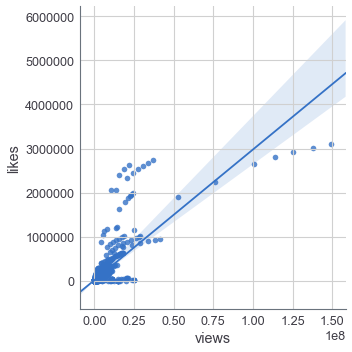

In [5]:
sns.lmplot(x='views', y='likes', data=rd)

### Build the regression Model

In [6]:
# random forest regression
rfc = RandomForestRegressor(n_estimators=20, min_samples_split=4)
rfc.fit(x_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=4,
           min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

### Metrics for evaluating the model

mse: 2100966418.013
r-squared: 0.905
feature-importances: [0.08811177 0.03100792 0.88088031]


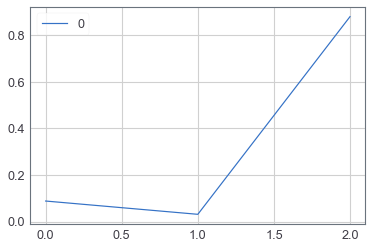

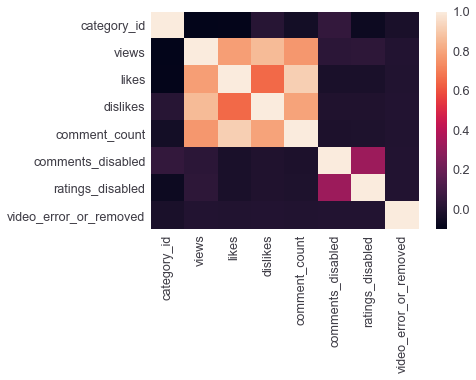

In [7]:
pred = rfc.predict(x_test)

# r-squared and mse
r2 = r2_score(y_test, pred)
mse = mean_squared_error(y_test, pred)

print("mse: %0.3f" % mse)
print("r-squared: %0.3f" % r2)
print("feature-importances:", rfc.feature_importances_)

# convert the feature_importance to a matrix
fi = pd.DataFrame(rfc.feature_importances_)
fi.plot()
plt.show()

# visualize the correlation
corr = rd.corr()
sns.heatmap(corr,xticklabels=corr.columns.values,yticklabels=corr.columns.values)